# Capstone Project - The Battle of the Cities and their restaurants  
### Applied Data Science Capstone by IBM/Coursera (Week 2)

## Table of contents
* [Introduction: Decision Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



# Introduction: Decision Problem <a name="introduction"></a>

The problem of this project is to help decide, where to drive with our new weekend car for the best food. The idea is to make a roadtrip to the best restaurant. But since parking is tough in each city, it should be just looked out for restaurant categories. It should be evaluated to which city to drive makes the most sense according to likes of restaurants in each city provided by Four Square. Then, it should be shown through data analysis for which restaurant type/class to look out for in this city. Is it the Kebab in Frankfurt, the Brauhaus in Cologne or the Biergarten in Munich?
Let's find out!

# Data <a name="data"></a>

The dataframe will be named 'raw_dataset' as it is the most complete compiled form of the data before needing any processing for analysis via machine learning.

1. the geographical coordinates of the three cities (Munich, Frankfurt and Cologne) is obtained,
2. establish the Foursquare API in order to get the URLs that give the raw data in JSON form,
3. each respective URL is then scraped for the columns: 'name', 'categories', 'latitude', 'longitude', and'id' for each city,

3.1 the city column will help us when separating where the restaurants are from.

The focus will be on those restaurants found within a 800km radius from the coordinates that were provided by the geolocator. The Foursquare API provides with abundant venue categories only with that big radius. In real-life this makes no sense at all, since the cities are closer than 800 km from each other. But for the sake of the project and obtaining at least some data, we will continue like this. The results needs to be cleaned out by removing non-restaurant rows. Pulling the 'Likes' data is necessary to make final decisions. The 'id' column is used in order to pull the 'Likes' using the API and append the information into the dataframe. We concluded by naming the dataframe 'raw_dataset', which is used in the machine learning portion of the project.

## Import <a name="import"></a>

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np 
import json
import requests
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors

! pip install folium==0.5.0

import folium 
import matplotlib.pyplot as plt
import pylab as pl
import itertools
import warnings
warnings.filterwarnings('ignore')

from urllib.request import urlopen
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim 
from sklearn import linear_model
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
print('All libraries have been imported')

     |████████████████████████████████| 79 kB 9.1 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=4478206aa1abd0de11932c3997d2383fee6029aa68e9d9ad25943fd99617d869
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
All libraries have been imported


Let's get the coordinates for three possible cities in Germany where we could drive to check on the best restaurant.

In [2]:
address1 = 'Munich, Germany'

geolocator = Nominatim(user_agent="foursquare_agent")
location1 = geolocator.geocode(address1)
latitude1 = location1.latitude
longitude1 = location1.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address1, latitude1, longitude1))

address2 = 'Frankfurt, Germany'

geolocator = Nominatim(user_agent="foursquare_agent")
location2 = geolocator.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address2, latitude2, longitude2))

address3 = 'Cologne, Germany'

geolocator = Nominatim(user_agent="foursquare_agent")
location3 = geolocator.geocode(address3)
latitude3 = location3.latitude
longitude3 = location3.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address3, latitude3, longitude3))

The geograpical coordinate of Munich, Germany are 48.1371079, 11.5753822.
The geograpical coordinate of Frankfurt, Germany are 50.1106444, 8.6820917.
The geograpical coordinate of Cologne, Germany are 50.938361, 6.959974.


## Foursquare credentials

In [3]:
CLIENT_ID = 'E1URKQIKPYGGF3X0KRKGT4R0GAEGJKLS555S2RCQFCXUYMDY' # your Foursquare ID
CLIENT_SECRET = 'QTZ5BGCRQMNLOPTSCKLRKBXAYECVP53HCJ0HRVPINABU0KS5' # your Foursquare Secret
VERSION = '20180604'

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 800 # define radius

# create URLs
url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude1, 
    longitude1, 
    radius, 
    LIMIT)


# create URLs
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude2, 
    longitude2, 
    radius, 
    LIMIT)


# create URLs
url3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude3, 
    longitude3, 
    radius, 
    LIMIT)

print(url1, url2, url3)

Your credentials:
CLIENT_ID: E1URKQIKPYGGF3X0KRKGT4R0GAEGJKLS555S2RCQFCXUYMDY
CLIENT_SECRET:QTZ5BGCRQMNLOPTSCKLRKBXAYECVP53HCJ0HRVPINABU0KS5
https://api.foursquare.com/v2/venues/explore?&client_id=E1URKQIKPYGGF3X0KRKGT4R0GAEGJKLS555S2RCQFCXUYMDY&client_secret=QTZ5BGCRQMNLOPTSCKLRKBXAYECVP53HCJ0HRVPINABU0KS5&v=20180604&ll=48.1371079,11.5753822&radius=800&limit=200 https://api.foursquare.com/v2/venues/explore?&client_id=E1URKQIKPYGGF3X0KRKGT4R0GAEGJKLS555S2RCQFCXUYMDY&client_secret=QTZ5BGCRQMNLOPTSCKLRKBXAYECVP53HCJ0HRVPINABU0KS5&v=20180604&ll=50.1106444,8.6820917&radius=800&limit=200 https://api.foursquare.com/v2/venues/explore?&client_id=E1URKQIKPYGGF3X0KRKGT4R0GAEGJKLS555S2RCQFCXUYMDY&client_secret=QTZ5BGCRQMNLOPTSCKLRKBXAYECVP53HCJ0HRVPINABU0KS5&v=20180604&ll=50.938361,6.959974&radius=800&limit=200


## Data Exploration

In [4]:
# scrape the data from the generated URLs

results1 = requests.get(url1).json()
results1

results2 = requests.get(url2).json()
results2

results3 = requests.get(url3).json()
results3

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

# FIRST CITY   

venues1 = results1['response']['groups'][0]['items']
nearby_venues1 = pd.json_normalize(venues1) # flatten JSON

# filter columns
filtered_columns1 = ['venue.name', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']
nearby_venues1 = nearby_venues1.loc[:, filtered_columns1]

# filter the category for each row
nearby_venues1['venue.categories'] = nearby_venues1.apply(get_category_type, axis=1)

# clean columns
nearby_venues1.columns = [col.split(".")[-1] for col in nearby_venues1.columns]

# SECOND CITY

venues2 = results2['response']['groups'][0]['items']
nearby_venues2 = pd.json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']
nearby_venues2 = nearby_venues2.loc[:, filtered_columns2]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

# THIRD CITY

venues3 = results3['response']['groups'][0]['items']
nearby_venues3 = pd.json_normalize(venues3) # flatten JSON

# filter columns
filtered_columns3 = ['venue.name', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']
nearby_venues3 = nearby_venues3.loc[:, filtered_columns3]

# filter the category for each row
nearby_venues3['venue.categories'] = nearby_venues3.apply(get_category_type, axis=1)

# clean columns
nearby_venues3.columns = [col.split(".")[-1] for col in nearby_venues3.columns]





print('{} venues for Munich, Germany were returned by Foursquare.'.format(nearby_venues1.shape[0]))
print()
print('{} venues for Frankfurt, Germany were returned by Foursquare.'.format(nearby_venues2.shape[0]))
print()
print('{} venues for Cologne, Germany were returned by Foursquare.'.format(nearby_venues3.shape[0]))

100 venues for Munich, Germany were returned by Foursquare.

100 venues for Frankfurt, Germany were returned by Foursquare.

100 venues for Cologne, Germany were returned by Foursquare.


In [5]:
# add locations data to the data sets of each city

nearby_venues1['city'] = 'Munich'
nearby_venues2['city'] = 'Frankfurt'
nearby_venues3['city'] = 'Cologne'

In [6]:
# combine the three cities into one data set

nearby_venues = nearby_venues1.copy()
nearby_venues = nearby_venues.append(nearby_venues2)
nearby_venues = nearby_venues.append(nearby_venues3)

nearby_venues.head()

,name,categories,lat,lng,id,city
0,Marienplatz,Plaza,48.137125,11.575483,4ade0ccef964a520246921e3,Munich
1,Fischbrunnen,Fountain,48.137211,11.576047,4b59e1fbf964a520189e28e3,Munich
2,Alois Dallmayr,Gourmet Shop,48.138469,11.577372,4ade0d22f964a520fa6a21e3,Munich
3,Chocolaterie Beluga,Café,48.135750,11.575776,4c65358a94160f47eab52e17,Munich
4,Viktualienmarkt,Farmers Market,48.135070,11.576456,4ade0d12f964a5209c6a21e3,Munich


In [7]:
nearby_venues.shape


(300, 6)

In [8]:
nearby_venues['categories'].unique()

array(['Plaza', 'Fountain', 'Gourmet Shop', 'Café', 'Farmers Market',
       'Coffee Shop', 'Organic Grocery', 'Beer Garden',
       'Department Store', 'Church', 'Burrito Place', 'German Restaurant',
       'Fish Market', 'Falafel Restaurant', 'Ice Cream Shop',
       'Bavarian Restaurant', "Men's Store", 'Sandwich Place', 'Boutique',
       'Irish Pub', 'Snack Place', 'Clothing Store', 'Hotel',
       'Candy Store', 'Seafood Restaurant',
       'Vegetarian / Vegan Restaurant', 'Opera House', 'Strip Club',
       'Italian Restaurant', 'Cupcake Shop', 'Food Court', 'Bookstore',
       'Cocktail Bar', 'Steakhouse', 'Art Museum', 'Shopping Mall',
       'Speakeasy', 'Wine Bar', 'Drugstore', 'Convenience Store',
       'Restaurant', 'Jazz Club', 'English Restaurant', 'Wine Shop',
       'Middle Eastern Restaurant', 'Historic Site', 'Roof Deck',
       'Museum', 'Theater', 'Cosmetics Shop', 'Bar', 'Manti Place',
       'Bank', 'Burger Joint', 'Palace', 'Scenic Lookout', 'Market',
       'C

## Data cleaning

In [69]:
# check list and manually remove all non-restaurant data

nearby_venues['categories'].unique()

removal_list = ['Plaza', 'Fountain', 'Gourmet Shop','Donut Shop', 'Café', 'Farmers Market', 'Coffee Shop', 'Organic Grocery', 'Church', 'Department Store', 'Fish Market', 'Ice Cream Shop', "Men's Store",  'Boutique', 'Hotel', 'Candy Store', 'Opera House', 'Sandwich Place', 'Strip Club', 'Clothing Store', 'Cupcake Shop', 'Steakhouse', 'Bookstore', 'Cocktail Bar', 'Art Museum', 'Shopping Mall', 'Jazz Club', 'Convenience Store', 'Speakeasy', 'Wine Bar', 'Historic Site', 'Wine Shop', 'Roof Deck', 'Museum', 'Theater', 'Cosmetics Shop', 'Bar', 'Tea Room', 'Optical Shop', 'Market', 'Scenic Lookout', 'River', 'Chocolate Shop', 'Bakery', 'Bistro', 'Gym / Fitness Center', 'Beer Bar', 'Toy / Game Store', 'Pedestrian Plaza', 'Food & Drink Shop', 'Dessert Shop', 'History Museum', 'Waterfront', 'Building', 'Drugstore', 'Greek Restaurant', 'Bed & Breakfast', 'Lounge', 'Accessories Store', 'Food Stand', 'Dive Bar', 'Concert Hall', 'Park', 'Shoe Store', 'Electronics Store', 'Miscellaneous Shop', 'Pub', 'Sporting Goods Shop', 'Chinese Restaurant', 'Tourist Information Center', 'Hostel', 'Gay Bar', 'Grocery Store', 'Exhibit', 'Theme Restaurant', 'Supermarket', 'Business Service', 'Comedy Club', 'Performing Arts Venue', 'Juice Bar', 'Frozen Yogurt Shop', 'Paper / Office Supplies Store', 'Pharmacy', 'Stationery Store', 'Salad Place', 'Hotel Bar', 'Bank', 'Palace',
'Outdoor Sculpture']

nearby_venues = nearby_venues[~nearby_venues['categories'].isin(removal_list)]

nearby_venues['categories'].unique().tolist()

['Beer Garden',
 'Burrito Place',
 'German Restaurant',
 'Falafel Restaurant',
 'Bavarian Restaurant',
 'Irish Pub',
 'Snack Place',
 'Seafood Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Italian Restaurant',
 'Food Court',
 'Restaurant',
 'English Restaurant',
 'Middle Eastern Restaurant',
 'Manti Place',
 'Burger Joint',
 'Vietnamese Restaurant',
 'Sushi Restaurant',
 'Trattoria/Osteria',
 'Tapas Restaurant',
 'Turkish Restaurant',
 'Thai Restaurant',
 'Doner Restaurant',
 'Austrian Restaurant',
 'Japanese Restaurant',
 'French Restaurant',
 'Dim Sum Restaurant',
 'Lebanese Restaurant',
 'Brewery',
 'South American Restaurant',
 'Modern European Restaurant',
 'Mediterranean Restaurant',
 'Rhenisch Restaurant',
 'Gastropub',
 'Asian Restaurant',
 'Cantonese Restaurant']

## Setting Up DataFrame

In [70]:
url_list = []
like_list = []
json_list = []

for i in list(nearby_venues.id):
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)


nearby_venues['likes'] = like_list
nearby_venues.head()

[397, 9, 143, 225, 430, 574, 305, 12, 229, 93, 27, 9, 424, 21, 592, 3903, 17, 175, 191, 236, 64, 13, 17, 24, 141, 33, 47, 87, 110, 45, 13, 31, 192, 39, 62, 21, 16, 170, 43, 14, 253, 16, 8, 203, 13, 98, 34, 87, 25, 32, 16, 128, 127, 14, 27, 24, 60, 338, 30, 16, 39, 9, 83, 200, 270, 11, 12, 17, 56, 436, 16, 23, 8, 37, 27, 30, 33, 16, 58]


,name,categories,lat,lng,id,city,likes,categories_classified,ranking
7,Biergarten am Viktualienmarkt,Beer Garden,48.135194,11.576365,4bbc6329afe1b7136d4d304b,Munich,397,german,1
10,La Burrita,Burrito Place,48.136143,11.574489,5cdfe154e1f228002b8075da,Munich,9,world,4
12,ZWICKL Gastlichkeit am Viktualienmarkt,German Restaurant,48.135240,11.577249,50143667e4b0c79e483256fd,Munich,143,german,2
16,Sababa,Falafel Restaurant,48.134748,11.577250,4b8bb1b6f964a52051a732e3,Munich,225,middleeast,1
19,Andechser am Dom,Bavarian Restaurant,48.138302,11.573778,4ade0ca0f964a5202a6821e3,Munich,430,german,1


In [71]:
nearby_venues.count()

name                     79
categories               79
lat                      79
lng                      79
id                       79
city                     79
likes                    79
categories_classified    77
ranking                  79
dtype: int64

In [72]:
nearby_venues.shape

(79, 9)

In [73]:
raw_dataset = nearby_venues
raw_dataset.head()

,name,categories,lat,lng,id,city,likes,categories_classified,ranking
7,Biergarten am Viktualienmarkt,Beer Garden,48.135194,11.576365,4bbc6329afe1b7136d4d304b,Munich,397,german,1
10,La Burrita,Burrito Place,48.136143,11.574489,5cdfe154e1f228002b8075da,Munich,9,world,4
12,ZWICKL Gastlichkeit am Viktualienmarkt,German Restaurant,48.135240,11.577249,50143667e4b0c79e483256fd,Munich,143,german,2
16,Sababa,Falafel Restaurant,48.134748,11.577250,4b8bb1b6f964a52051a732e3,Munich,225,middleeast,1
19,Andechser am Dom,Bavarian Restaurant,48.138302,11.573778,4ade0ca0f964a5202a6821e3,Munich,430,german,1


In [74]:
raw_dataset['categories'].unique().tolist()

['Beer Garden',
 'Burrito Place',
 'German Restaurant',
 'Falafel Restaurant',
 'Bavarian Restaurant',
 'Irish Pub',
 'Snack Place',
 'Seafood Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Italian Restaurant',
 'Food Court',
 'Restaurant',
 'English Restaurant',
 'Middle Eastern Restaurant',
 'Manti Place',
 'Burger Joint',
 'Vietnamese Restaurant',
 'Sushi Restaurant',
 'Trattoria/Osteria',
 'Tapas Restaurant',
 'Turkish Restaurant',
 'Thai Restaurant',
 'Doner Restaurant',
 'Austrian Restaurant',
 'Japanese Restaurant',
 'French Restaurant',
 'Dim Sum Restaurant',
 'Lebanese Restaurant',
 'Brewery',
 'South American Restaurant',
 'Modern European Restaurant',
 'Mediterranean Restaurant',
 'Rhenisch Restaurant',
 'Gastropub',
 'Asian Restaurant',
 'Cantonese Restaurant']

In [75]:
# we can group some restaurant types together to make a better categorical variable

german = ['Beer Garden', 'German Restaurant', 'Bavarian Restaurant', 'Brewery', 'Rhenisch Restaurant', 'Austrian Restaurant']

european = ['Italian Restaurant', 'Pizza Place', 'Mediterranean Restaurant', 'French Restaurant', 'Irish Pub', 'English Restaurant', 'Trattoria/Osteria', 'Modern European Restaurant']

world = ['Vietnamese Restaurant', 'Sushi Restaurant', 'Japanese Restaurant', 'Indian Restaurant', 'Cantonese Restaurant', 'Asian Restaurant', 'Thai Restaurant', 'Tapas Restaurant', 'South American Restaurant', 'Burrito Place', 'Dim Sum Haus', 'Dim Sum Restaurant']

middleeast = ['Falafel Restaurant', 'Middle Eastern Restaurant', 'Manti Place', 'Lebanese Restaurant', 'Doner Restaurant', 'Turkish Restaurant']

others = ['Snack Place', 'Food Court', 'Restaurant', 'Seafood Restaurant', 'Burger Joint', 'Vegetarian / Vegan Restaurant', 'Gastropub']



def conditions(s):
    if s['categories'] in german:
        return 'german'
    if s['categories'] in european:
        return 'european'
    if s['categories'] in world:
        return 'world'
    if s['categories'] in middleeast:
        return 'middleeast'
    if s['categories'] in others:
        return 'others'

raw_dataset['categories_classified'] = raw_dataset.apply(conditions, axis=1)
raw_dataset.head()

,name,categories,lat,lng,id,city,likes,categories_classified,ranking
7,Biergarten am Viktualienmarkt,Beer Garden,48.135194,11.576365,4bbc6329afe1b7136d4d304b,Munich,397,german,1
10,La Burrita,Burrito Place,48.136143,11.574489,5cdfe154e1f228002b8075da,Munich,9,world,4
12,ZWICKL Gastlichkeit am Viktualienmarkt,German Restaurant,48.135240,11.577249,50143667e4b0c79e483256fd,Munich,143,german,2
16,Sababa,Falafel Restaurant,48.134748,11.577250,4b8bb1b6f964a52051a732e3,Munich,225,middleeast,1
19,Andechser am Dom,Bavarian Restaurant,48.138302,11.573778,4ade0ca0f964a5202a6821e3,Munich,430,german,1


In [76]:
raw_dataset.shape

(79, 9)

## Check Categories

In [77]:
pd.crosstab(index = raw_dataset["categories_classified"],
            columns="count")

col_0,count
categories_classified,
european,19
german,24
middleeast,6
others,17
world,13


In [78]:
raw_dataset['likes'].describe()

count      79.000000
mean      153.468354
std       447.964509
min         8.000000
25%        17.000000
50%        39.000000
75%       156.500000
max      3903.000000
Name: likes, dtype: float64

In [79]:
## let's bin the likes according to their quartiles

def rankings(df):
    
    if df['likes'] <= 17:
        return 4
    
    elif df['likes'] <= 39:
        return 3
    
    elif df['likes'] <= 156:
        return 2
    elif df['likes'] > 156:
        return 1


In [80]:
raw_dataset['ranking'] = raw_dataset.apply(rankings, axis=1)

In [82]:
raw_dataset.head()

,name,categories,lat,lng,id,city,likes,categories_classified,ranking
7,Biergarten am Viktualienmarkt,Beer Garden,48.135194,11.576365,4bbc6329afe1b7136d4d304b,Munich,397,german,1
10,La Burrita,Burrito Place,48.136143,11.574489,5cdfe154e1f228002b8075da,Munich,9,world,4
12,ZWICKL Gastlichkeit am Viktualienmarkt,German Restaurant,48.135240,11.577249,50143667e4b0c79e483256fd,Munich,143,german,2
16,Sababa,Falafel Restaurant,48.134748,11.577250,4b8bb1b6f964a52051a732e3,Munich,225,middleeast,1
19,Andechser am Dom,Bavarian Restaurant,48.138302,11.573778,4ade0ca0f964a5202a6821e3,Munich,430,german,1


# Methodology  <a name="methodology"></a>

A dataframe called raw_dataset was set up. For the German citites of Munich, Frankfurt and Cologne the likes from FourSquare for restaurants were pulled. For later analysis purposes the restaurant were divided into categories: German, World, Others, Middleeast and European. This categorization shall help to better sort restaurants while driving through one of the cities. Furthermore the likes were categorized based on their quartiles into 4 categories. Right now, a decision tree should show, in which city it is most likely to obtain the highest likelihood for good food according to likes on FourSquare. The idea behind the Decision Tree is to give a help for possible decisions while driving through each city. Which restaurant category might provide the most likes and best food?
Afterwards a regression analysis will be performed to get statistical insights regarding to which city to drive in the first place for the best restaurants. Secondly, the best cuisine category should be found through regression analysis.

# Analysis <a name="analysis"></a>

## Let's create a decision tree

That's especially important while driving around with a car. For which factor in a restaurant place should we look at first?!

In [83]:
# pre-process data

X = raw_dataset[['ranking']].values


X[0:5]

array([[1],
       [4],
       [2],
       [1],
       [1]])

In [84]:
# target variable
y = raw_dataset['categories_classified']
y[0:5]

7         german
10         world
12        german
16    middleeast
19        german
Name: categories_classified, dtype: object

In [85]:
from sklearn import preprocessing

le_categories_classified = preprocessing.LabelEncoder()
le_categories_classified.fit(['german', 'world', 'others','middleeast','european'])
y = le_categories_classified.transform(y)

In [86]:
## create test-splits

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=4)

In [87]:
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))


Shape of X training set (24, 1) &  Size of Y training set (24,)


In [88]:
from sklearn.tree import DecisionTreeClassifier

foodTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
foodTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [89]:
foodTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Predictions
Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>

In [90]:
predTree = foodTree.predict(X_testset)

In [91]:
print (predTree [0:5])
print (y_testset [0:5])

[3 4 3 4 1]
[4 3 0 2 1]


## Evaluation of Decision Tree

In [92]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.2916666666666667


That's a low Accuracy! Let's check Random Forest Classifier method!

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc = RandomForestClassifier(criterion = 'entropy', random_state = 3)
rfc.fit(X_trainset, y_trainset)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_trainset)


In [94]:
rfc_pred_test = rfc.predict(X_testset)
print("RandonForestClassifier's Accuracy",metrics.accuracy_score(y_testset,rfc_pred_test))

RandonForestClassifier's Accuracy 0.2916666666666667


In [95]:
from sklearn import tree


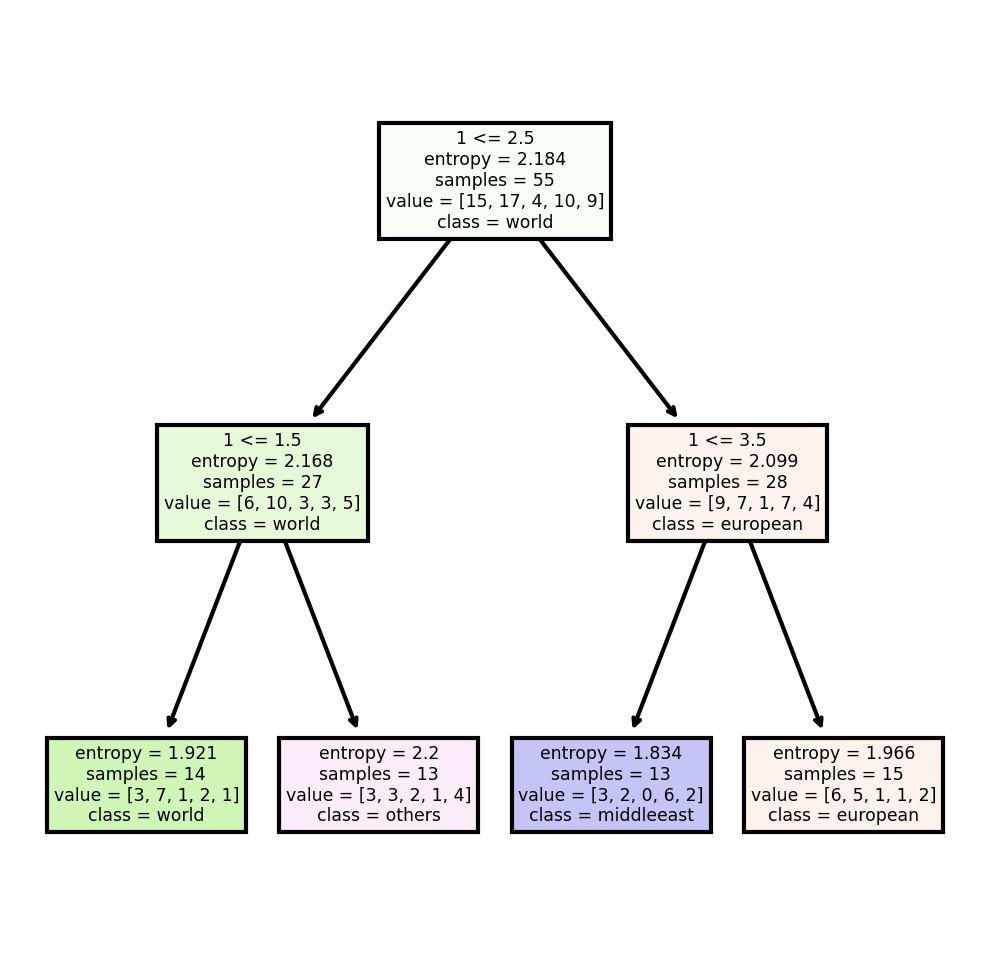

In [96]:
cn=['european','world','german','middleeast','others']
fn=[1,2,3,4]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(foodTree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')


So the precision of either Decision Tree or the alternative Random Forest Classifier is pretty low. This means we should generally not rely too much on those Trees. But, since we already begun with our Decision Tree, let's just set them up for each city. This will be helpful in the discussion/ conclusion to see to which cuisine to look for in which city.

# Now let's check in which city we would have to look out for which types of restaurants!

# 1 Munich

In [97]:
m_raw_dataset = raw_dataset.loc[raw_dataset['city'] == 'Munich']

m_raw_dataset.head()

,name,categories,lat,lng,id,city,likes,categories_classified,ranking
7,Biergarten am Viktualienmarkt,Beer Garden,48.135194,11.576365,4bbc6329afe1b7136d4d304b,Munich,397,german,1
10,La Burrita,Burrito Place,48.136143,11.574489,5cdfe154e1f228002b8075da,Munich,9,world,4
12,ZWICKL Gastlichkeit am Viktualienmarkt,German Restaurant,48.135240,11.577249,50143667e4b0c79e483256fd,Munich,143,german,2
16,Sababa,Falafel Restaurant,48.134748,11.577250,4b8bb1b6f964a52051a732e3,Munich,225,middleeast,1
19,Andechser am Dom,Bavarian Restaurant,48.138302,11.573778,4ade0ca0f964a5202a6821e3,Munich,430,german,1


Shape of X training set (9, 1) &  Size of Y training set (9,)
DecisionTrees's Accuracy:  0.3333333333333333


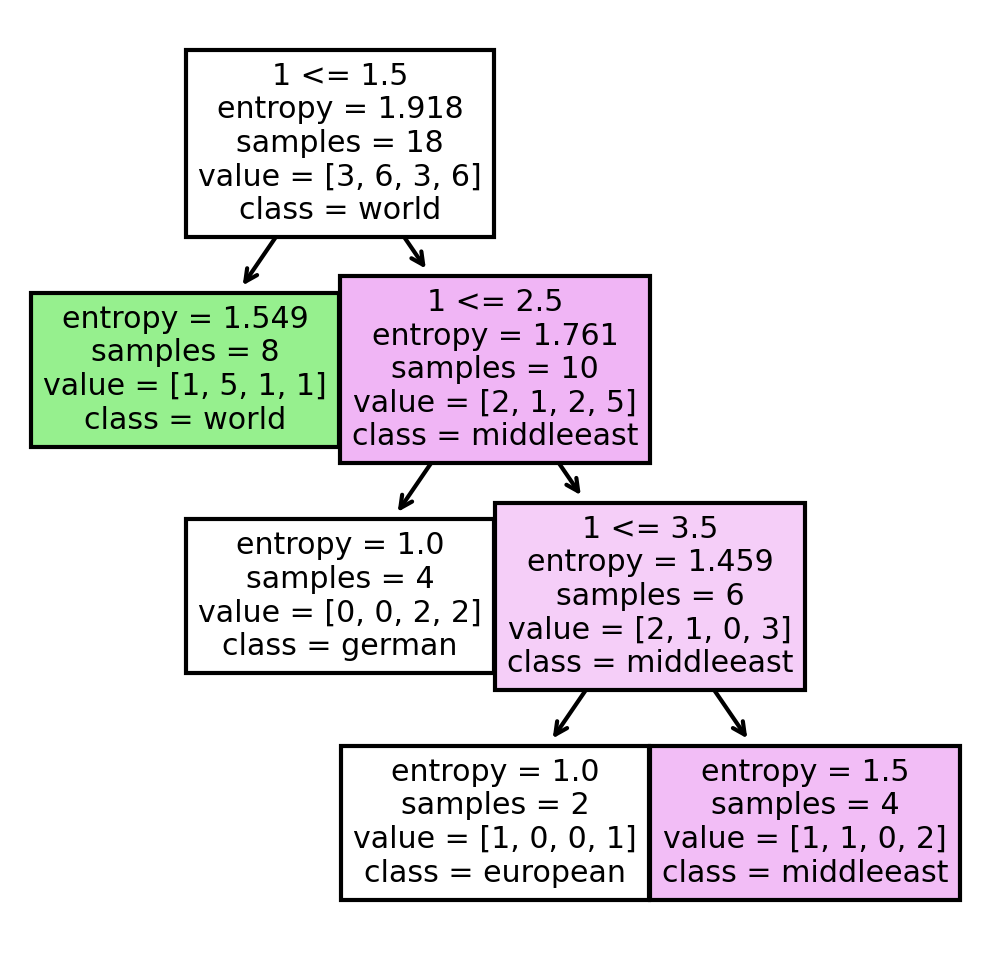

In [98]:
## pre-process data

Xm = m_raw_dataset[['ranking']].values
## target variable
ym = m_raw_dataset['categories_classified']

from sklearn import preprocessing

le_categories_classified = preprocessing.LabelEncoder()
le_categories_classified.fit(['german', 'world', 'others','middleeast','european'])
ym = le_categories_classified.transform(ym)

## create test-splits

Xm_trainset, Xm_testset, ym_trainset, ym_testset = train_test_split(Xm, ym, test_size=0.3, random_state=3)

print('Shape of X training set {}'.format(Xm_testset.shape),'&',' Size of Y training set {}'.format(ym_testset.shape))


mfoodTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
mfoodTree # it shows the default parameters

mfoodTree.fit(Xm_trainset,ym_trainset)

mpredTree = mfoodTree.predict(Xm_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(ym_testset, mpredTree))

cnm=['european','world','german','middleeast','others']
fnm=[1,2,3,4]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(mfoodTree,
               feature_names = fnm, 
               class_names=cnm,
               filled = True);
fig.savefig('imagename.png')

# 2 Frankfurt


In [99]:
f_raw_dataset = raw_dataset.loc[raw_dataset['city'] == 'Frankfurt']

f_raw_dataset.head()

,name,categories,lat,lng,id,city,likes,categories_classified,ranking
10,Góc Phố,Vietnamese Restaurant,50.113509,8.681686,57b34f2e498edc52148534fb,Frankfurt,87,world,2
11,Superkato,Sushi Restaurant,50.111664,8.679153,4bd6c6ab6f6495213c4871ec,Frankfurt,110,world,2
13,Heimat – Essen und Weine,German Restaurant,50.111125,8.678286,4cfd2a882c1aa090410e057a,Frankfurt,45,german,2
16,Questione Di Gusto,Italian Restaurant,50.112424,8.682045,55f45874498e0794ff18de52,Frankfurt,13,european,4
19,Fisch Franke,Seafood Restaurant,50.112252,8.684247,4e958481b634ee03e630cc79,Frankfurt,31,others,3


Shape of X training set (8, 1) &  Size of Y training set (8,)
DecisionTrees's Accuracy:  0.125


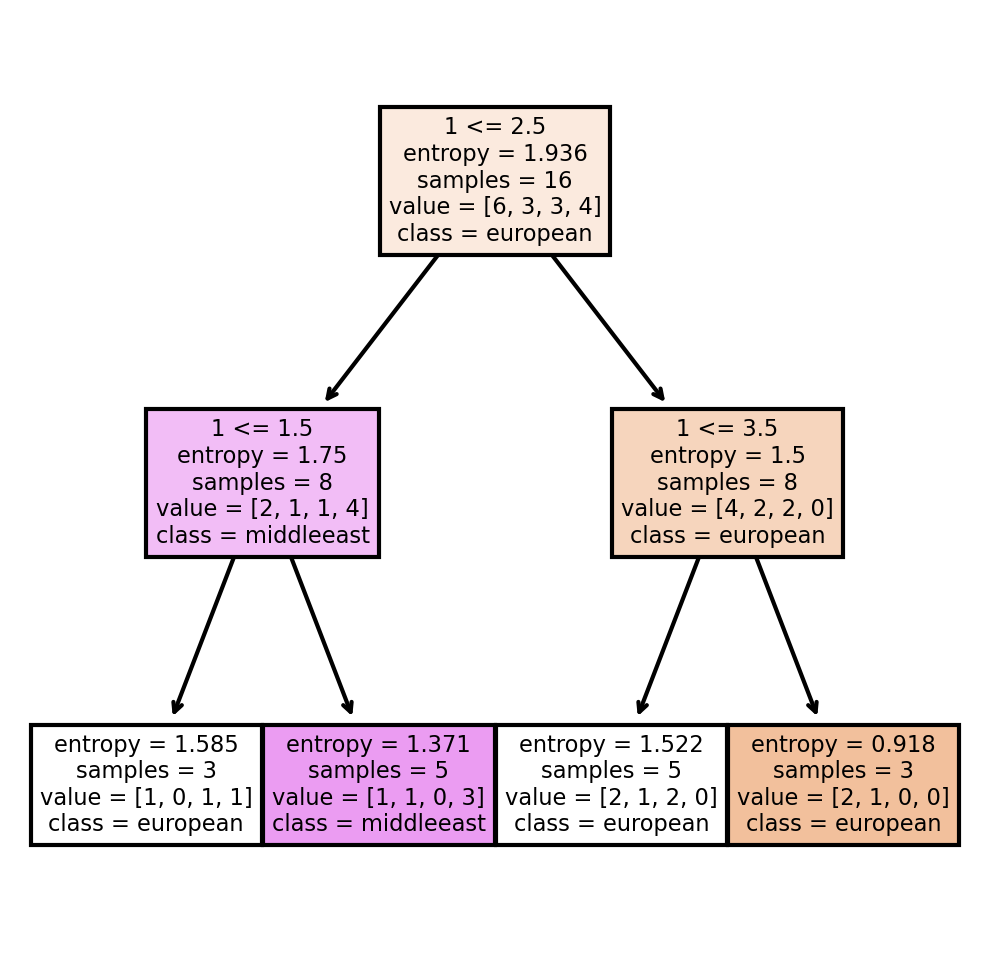

In [112]:
## pre-process data

Xf = f_raw_dataset[['ranking']].values
## target variable
yf = f_raw_dataset['categories_classified']

from sklearn import preprocessing

le_categories_classified = preprocessing.LabelEncoder()
le_categories_classified.fit(['german', 'world', 'others','middleeast','european'])
yf = le_categories_classified.transform(yf)

## create test-splits

Xf_trainset, Xf_testset, yf_trainset, yf_testset = train_test_split(Xf, yf, test_size=0.3, random_state=3)

print('Shape of X training set {}'.format(Xf_testset.shape),'&',' Size of Y training set {}'.format(yf_testset.shape))


ffoodTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
ffoodTree # it shows the default parameters

ffoodTree.fit(Xf_trainset,yf_trainset)

fpredTree = ffoodTree.predict(Xf_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(yf_testset, fpredTree))

cnf=['european','world','german','middleeast','others']
fnf=[1,2,3,4]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(ffoodTree,
               feature_names = fnf, 
               class_names=cnf,
               filled = True);
fig.savefig('imagename.png')

# 3 Cologne

In [101]:
c_raw_dataset = raw_dataset.loc[raw_dataset['city'] == 'Cologne']

c_raw_dataset.head()

,name,categories,lat,lng,id,city,likes,categories_classified,ranking
13,Servus Colonia Alpina,Bavarian Restaurant,50.937423,6.959806,55c4d339498e74d99351eb1f,Cologne,128,german,2
16,Beirut,Lebanese Restaurant,50.936925,6.962338,4b3517f6f964a520562a25e3,Cologne,127,middleeast,2
19,Sattgrün,Vegetarian / Vegan Restaurant,50.938441,6.954965,5c33306cc824ae002c2b414c,Cologne,14,others,4
24,maiBeck,Restaurant,50.940339,6.962049,52519c2b11d2334eef8aca94,Cologne,27,others,3
26,Via Sistina An Farina,Italian Restaurant,50.938028,6.957819,514b5e14e4b067fa95cfb69a,Cologne,24,european,3


Shape of X training set (9, 1) &  Size of Y training set (9,)
DecisionTrees's Accuracy:  0.4444444444444444


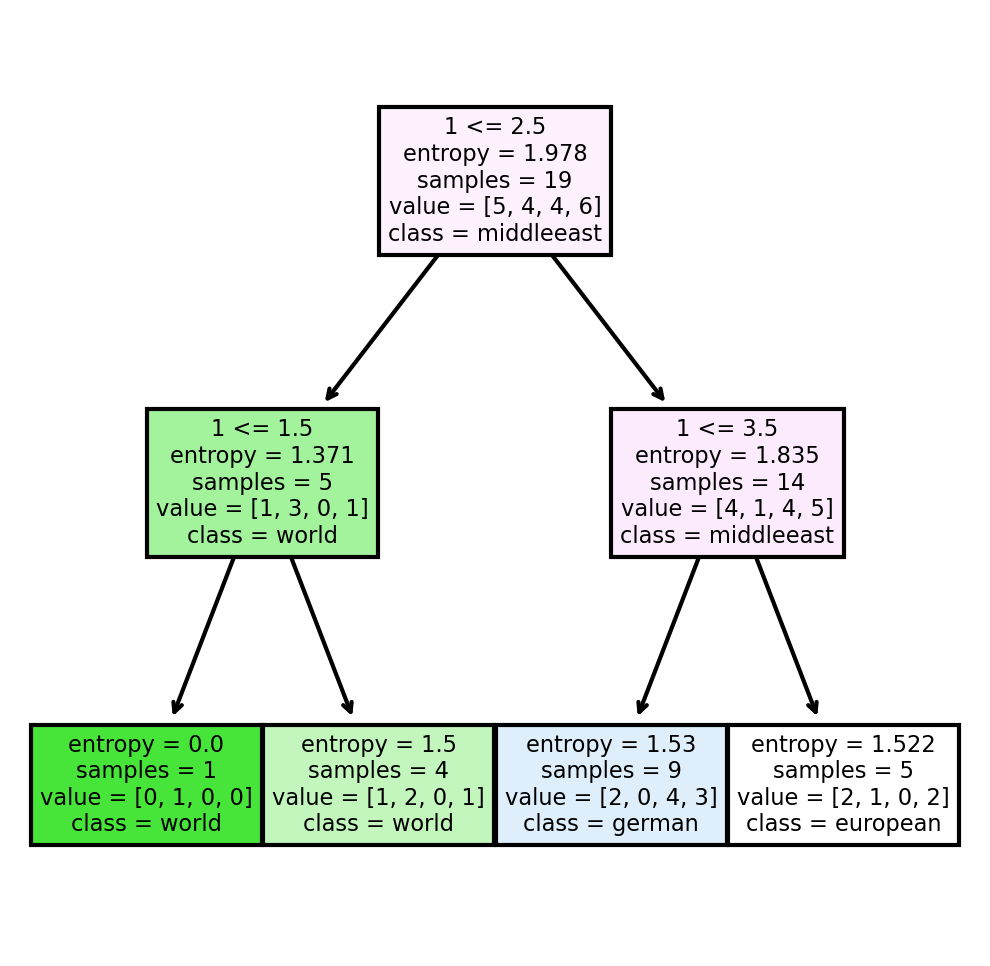

In [102]:
## pre-process data

Xc = c_raw_dataset[['ranking']].values
## target variable
yc = c_raw_dataset['categories_classified']

from sklearn import preprocessing

le_categories_classified = preprocessing.LabelEncoder()
le_categories_classified.fit(['german', 'world', 'others','middleeast','european'])
yc = le_categories_classified.transform(yc)

## create test-splits

Xc_trainset, Xc_testset, yc_trainset, yc_testset = train_test_split(Xc, yc, test_size=0.3, random_state=3)

print('Shape of X training set {}'.format(Xc_testset.shape),'&',' Size of Y training set {}'.format(yc_testset.shape))


cfoodTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
cfoodTree # it shows the default parameters

cfoodTree.fit(Xc_trainset,yc_trainset)

cpredTree = cfoodTree.predict(Xc_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(yc_testset, cpredTree))

cnc=['european','world','german','middleeast','others']
fnc=[1,2,3,4]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(cfoodTree,
               feature_names = fnc, 
               class_names=cnc,
               filled = True);
fig.savefig('imagename.png')

## Regression Analysis

In [103]:
# lets start off with a multiple linear regression
# create dummies for linear regression modelling

# one hot encoding
reg_dataset = pd.get_dummies(raw_dataset[['categories_classified', 
                                          'city',]], 
                               prefix="", 
                               prefix_sep="")

# add name, ranking, and likes columns back to dataframe
reg_dataset['ranking'] = raw_dataset['ranking']
reg_dataset['likes'] = raw_dataset['likes']
reg_dataset['name'] = raw_dataset['name']

In [119]:

msk = np.random.rand(len(reg_dataset)) < 0.7
train = reg_dataset[msk]
test = reg_dataset[~msk]

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['european','world','german','middleeast','others','Munich', 'Frankfurt', 'Cologne']])

y = np.asanyarray(train[['likes']])
regr.fit (x, y)

# The coefficients

print ('Coefficients: ', regr.coef_)

Coefficients:  [[ -22.62239103  -16.02296746  241.34851276  -85.12094994 -117.58220433
   164.83908149 -107.77109548  -57.06798601]]


In [120]:
coefficients = pd.concat([pd.DataFrame(['european','world','german','middleeast','others','Munich', 'Frankfurt', 'Cologne']),pd.DataFrame(np.transpose(regr.coef_))], axis = 1)

coefficients

,0,0
0,european,-22.622391
1,world,-16.022967
2,german,241.348513
3,middleeast,-85.120950
4,others,-117.582204
5,Munich,164.839081
6,Frankfurt,-107.771095
7,Cologne,-57.067986


In [121]:
# Multiple Linear Regression Prediction Capabilities

y_hat= regr.predict(test[['european','world','german','middleeast','others','Munich', 'Frankfurt', 'Cologne']])

x = np.asanyarray(test[['european','world','german','middleeast','others','Munich', 'Frankfurt', 'Cologne']])

y = np.asanyarray(test[['likes']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))


Residual sum of squares: 38273.71
Variance score: -0.80


So the Variance score is negative... Lets try some polynomial regression instead!

In [122]:
# Multinomial Ordinal Logistic Regression

x_train = np.asanyarray(train[['european','world','german','middleeast','others','Munich', 'Frankfurt', 'Cologne']])

y_train = np.asanyarray(train['ranking'])

x_test = np.asanyarray(test[['european','world','german','middleeast','others','Munich', 'Frankfurt', 'Cologne']])

y_test = np.asanyarray(test['ranking'])


mul_ordinal = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg', fit_intercept=True).fit(x_train, y_train)

mul_ordinal

coef = mul_ordinal.coef_[0]
print (coef)

[ 0.39331958 -0.21761786  0.74696685 -0.49105518 -0.43161562  0.54276343
 -0.17598212 -0.36678354]


In [123]:
coefficients_mul = pd.concat([pd.DataFrame(['european','world','german','middleeast','others','Munich', 'Frankfurt', 'Cologne']),pd.DataFrame(np.transpose(mul_ordinal.coef_))], axis = 1)

coefficients_mul

,0,0,1,2,3
0,european,0.393320,-0.348465,0.046881,-0.091736
1,world,-0.217618,0.180115,0.084550,-0.047047
2,german,0.746967,-0.393141,-0.215160,-0.138666
3,middleeast,-0.491055,0.988480,-0.505144,0.007720
4,others,-0.431616,-0.426988,0.588873,0.269731
5,Munich,0.542763,-0.137190,-0.170318,-0.235255
6,Frankfurt,-0.175982,0.007378,0.030917,0.137687
7,Cologne,-0.366784,0.129814,0.139400,0.097569


In [124]:
# Multinomial Ordinal Logistic Regression Prediction Capabilities

yhat = mul_ordinal.predict(x_test)
yhat

yhat_prob = mul_ordinal.predict_proba(x_test)
yhat_prob


# average = None, average = 'micro', average = 'macro', or average = 'weighted'
jaccard_score(y_test, yhat, average='weighted')

0.15942028985507245

In [125]:
log_loss(y_test, yhat_prob)

1.4008828664119835

In [126]:
# exploration of coefficient magnitudes of the whole data set

x_all = np.asanyarray(reg_dataset[['european','world','german','middleeast','others','Munich', 'Frankfurt', 'Cologne']])

y_all = np.asanyarray(reg_dataset['ranking'])



LR = linear_model.LogisticRegression(multi_class='multinomial',
                                            solver='newton-cg',
                                            fit_intercept=True).fit(x_all,
                                                                    y_all)

LR

coef = LR.coef_[0]
print(coef)


[ 0.09545663 -0.37939138  0.68928228 -0.16783201 -0.23752019  0.60861878
 -0.23686232 -0.37176113]


In [128]:
coefficients_mul_all = pd.concat([pd.DataFrame(['european','world','german','middleeast','others','Munich', 'Frankfurt', 'Cologne']),pd.DataFrame(np.transpose(LR.coef_))], axis = 1)

coefficients_mul_all

,0,0,1,2,3
0,european,0.095457,-0.356812,0.090790,0.170565
1,world,-0.379391,0.355451,0.214505,-0.190565
2,german,0.689282,-0.097709,-0.364674,-0.226900
3,middleeast,-0.167832,0.578586,-0.591431,0.180677
4,others,-0.237520,-0.479513,0.650802,0.066231
5,Munich,0.608619,-0.097950,-0.350845,-0.159824
6,Frankfurt,-0.236862,0.145916,0.058908,0.032038
7,Cologne,-0.371761,-0.047963,0.291930,0.127794


In [127]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.40      0.33      0.36         6
           2       0.00      0.00      0.00         7
           3       0.38      0.75      0.50         4
           4       0.25      0.33      0.29         6

    accuracy                           0.30        23
   macro avg       0.26      0.35      0.29        23
weighted avg       0.23      0.30      0.26        23



# Results <a name="results"></a>

The overall Decision Tree had a low accuracy of 29%. The alternative Random Tree Forest Classifier had the same accuracy of 29%.
The Decision Tree for each city only showed improved accuracy for Cologne with 44%.

A linear regression model was trained on a random subsample of 70% and then the other 30% was used for testing purposes. The residual sum of squares and variance score were calculated.
Residual sum of squares: 38273.71
Variance score: -0.80

The variance score is negative. The linear regression is not a good way of modeling our data. Therefore, a logistic regression was performed for our analysis.

The multinomial ordinal logistic regression model was trained on a random subsample of 70% and then tested on the remaining 30%. The jaccard score and log-loss were both calculated.
Jaccard-Score: 0.15942028985507245
Log-Loss: 1.4008828664119835

Although the prediction is not too well, a jaccard score of 15% is somewhat reasonable. The classification report is included in the analysis.

Given the modestly accurate ability of this mode, model was run on the complete dataset. The coefficients show, that most factors show negative relations regarding the likes of a restaurant. Yet, the best combination to find a good restaurant is related to the factors "German" and "Munich".

# Discussion <a name="discussion"></a>

The Decision Tree showed, that, generally, in the three cities Munich, Frankfurt and Cologne the World kitchen is the go-to option, which consists mainly of Asian restaurants.
This is true also just looking only on the  cities of Munich and Cologne. In Frankfurt European cuisine, so Italian food shows the best ranking due to likes.

So, we already have some sort of sense to what to look out for, when approaching each city. But given, that the best result should be obtained through planning, it was set out to do a regression analysis. The linear regression analsis showed truly poor accuracy. Yet, the logistic regression was somewhat better, still with low accuracy (15%). This is probably due to a high variability in the data set. A way to obtain a higher Jaccard scores is by having more data. This is due to the low usage of FourSquare in Germany difficult. To find another data provider is out of scope for this project.

The logistic regression showed, that a restaurant in the model would most likely fall into the 1st category of more than 154 likes (40%). It has a 0% to fall into the second likes class and 38% and 25% to fall into the 3rd and 4th ranking class respectively.

So which city to drive to?
Munich shows most promise since it has a positive correlation to likes (r=0.61). Also German cuisine has the highest correlation to the highest ranking class in the model (r=0.69).
The other cities have negative correlations to the highest ranking class. So do the other cuisines, but "European" (r=0.06).

# Conclusion <a name="conclusion"></a>

The data analysis of restaurants in Munich, Frankfurt and Cologne shows, that Munich and German restaurants are to look out for, when searching for the best food in these towns. So Weißwurst and Weizen beer wins the comparison. Yet, the analysis shows low accuracies throughout each (!) step. This is due to few data provided by FourSquare. For "real-life" decision where to eat which cuisine, FourSquare seems unsuitable to provide sophisticated venue data - at least in major German cities. In a closer to real-life analysis better data should be used by more prominent providers in Germany such as Google maps. This was not possible for this project, though, due to fees.